In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [ ]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

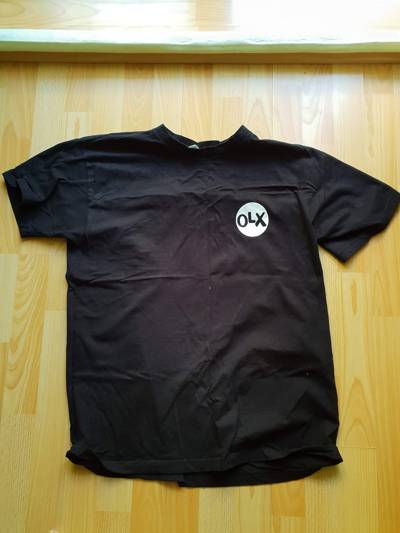

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-22 22:23:23.930932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 22:23:23.931450: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

91884032/91884032 [==============================] - 8s 0us/step


In [10]:
X = np.array([x])

In [11]:
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

2022-11-22 22:24:13.969849: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 22:24:14.154705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


In [14]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960014),
  ('n04370456', 'sweatshirt', 0.035299536),
  ('n03710637', 'maillot', 0.010884139),
  ('n04525038', 'velvet', 0.0018057585)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Tranfser learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
X, y = next(train_ds)

In [19]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 7s 0us/step


In [22]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2022-11-22 22:26:00.077399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.2947 - accuracy: 0.6587

2022-11-22 22:26:22.269656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 26s 237ms/step - loss: 1.2947 - accuracy: 0.6587 - val_loss: 1.0499 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 22s 230ms/step - loss: 0.5531 - accuracy: 0.8227 - val_loss: 0.9120 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 22s 231ms/step - loss: 0.3462 - accuracy: 0.8856 - val_loss: 0.7978 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 22s 228ms/step - loss: 0.2460 - accuracy: 0.9107 - val_loss: 0.8868 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 22s 228ms/step - loss: 0.1810 - accuracy: 0.9364 - val_loss: 0.8766 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 22s 231ms/step - loss: 0.1076 - accuracy: 0.9654 - val_loss: 0.8162 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 22s 230ms/step - loss: 0.0909 - accuracy: 0.9703 - val_loss: 0.8894 - val_accuracy: 0.8065
Epoch 8/10

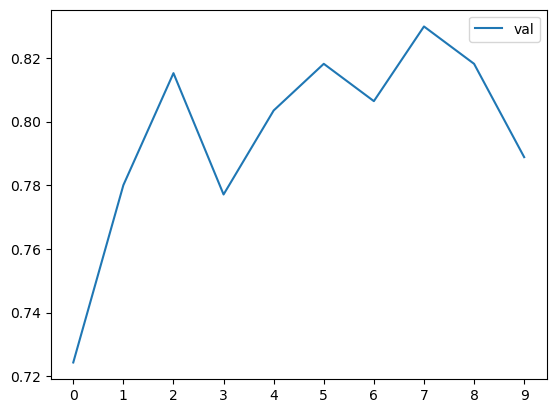

In [24]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [25]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10


2022-11-22 22:30:30.303028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.9142 - accuracy: 0.3625

2022-11-22 22:30:50.817753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 24s 237ms/step - loss: 1.9142 - accuracy: 0.3625 - val_loss: 1.5992 - val_accuracy: 0.4985
Epoch 2/10
96/96 [==============================] - 22s 231ms/step - loss: 1.3877 - accuracy: 0.5590 - val_loss: 1.2784 - val_accuracy: 0.5924
Epoch 3/10
96/96 [==============================] - 22s 230ms/step - loss: 1.1540 - accuracy: 0.6379 - val_loss: 1.0968 - val_accuracy: 0.6569
Epoch 4/10
96/96 [==============================] - 22s 229ms/step - loss: 1.0128 - accuracy: 0.6894 - val_loss: 0.9909 - val_accuracy: 0.6921
Epoch 5/10
96/96 [==============================] - 22s 233ms/step - loss: 0.9181 - accuracy: 0.7112 - val_loss: 0.9096 - val_accuracy: 0.7155
Epoch 6/10
96/96 [==============================] - 22s 229ms/step - loss: 0.8480 - accuracy: 0.7324 - val_loss: 0.8564 - val_accuracy: 0.7331
Epoch 7/10
96/96 [==============================] - 22s 229ms/step - loss: 0.7946 - accuracy: 0.7464 - val_loss: 0.8116 - val_accuracy: 0.7537
Epoch 8/10

2022-11-22 22:34:14.127537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0854 - accuracy: 0.6310

2022-11-22 22:34:34.776958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 24s 240ms/step - loss: 1.0854 - accuracy: 0.6310 - val_loss: 0.7193 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 22s 230ms/step - loss: 0.6338 - accuracy: 0.7813 - val_loss: 0.6195 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 22s 228ms/step - loss: 0.5086 - accuracy: 0.8325 - val_loss: 0.5757 - val_accuracy: 0.8211
Epoch 4/10
96/96 [==============================] - 22s 229ms/step - loss: 0.4274 - accuracy: 0.8641 - val_loss: 0.5974 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 22s 229ms/step - loss: 0.3786 - accuracy: 0.8797 - val_loss: 0.5525 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 22s 230ms/step - loss: 0.3284 - accuracy: 0.9078 - val_loss: 0.5492 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 22s 229ms/step - loss: 0.2917 - accuracy: 0.9153 - val_loss: 0.5344 - val_accuracy: 0.8182
Epoch 8/10

2022-11-22 22:37:57.594692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.2654 - accuracy: 0.6767

2022-11-22 22:38:18.190823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 24s 242ms/step - loss: 1.2654 - accuracy: 0.6767 - val_loss: 0.8763 - val_accuracy: 0.7361
Epoch 2/10
96/96 [==============================] - 22s 231ms/step - loss: 0.5458 - accuracy: 0.8334 - val_loss: 0.8888 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 22s 224ms/step - loss: 0.3928 - accuracy: 0.8716 - val_loss: 0.9243 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 22s 227ms/step - loss: 0.2611 - accuracy: 0.9100 - val_loss: 0.8813 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 22s 225ms/step - loss: 0.1772 - accuracy: 0.9390 - val_loss: 0.8623 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 22s 226ms/step - loss: 0.1031 - accuracy: 0.9596 - val_loss: 0.9157 - val_accuracy: 0.7830
Epoch 7/10
96/96 [==============================] - 22s 227ms/step - loss: 0.0734 - accuracy: 0.9759 - val_loss: 0.8828 - val_accuracy: 0.7947
Epoch 8/10

2022-11-22 22:41:53.998726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 9.8473 - accuracy: 0.6421

2022-11-22 22:42:14.591186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 25s 239ms/step - loss: 9.8473 - accuracy: 0.6421 - val_loss: 6.5552 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 22s 229ms/step - loss: 5.0448 - accuracy: 0.7901 - val_loss: 8.3304 - val_accuracy: 0.7507
Epoch 3/10
96/96 [==============================] - 22s 228ms/step - loss: 3.7051 - accuracy: 0.8308 - val_loss: 8.4153 - val_accuracy: 0.7478
Epoch 4/10
96/96 [==============================] - 22s 228ms/step - loss: 2.6699 - accuracy: 0.8677 - val_loss: 7.6529 - val_accuracy: 0.7713
Epoch 5/10
96/96 [==============================] - 22s 230ms/step - loss: 2.4930 - accuracy: 0.8693 - val_loss: 9.2903 - val_accuracy: 0.7595
Epoch 6/10
96/96 [==============================] - 693s 7s/step - loss: 2.3573 - accuracy: 0.8928 - val_loss: 10.0732 - val_accuracy: 0.7507
Epoch 7/10
96/96 [==============================] - 22s 232ms/step - loss: 2.3749 - accuracy: 0.8911 - val_loss: 11.0051 - val_accuracy: 0.7625
Epoch 8/10

In [27]:
del scores[0.1]
del scores[0.0001]

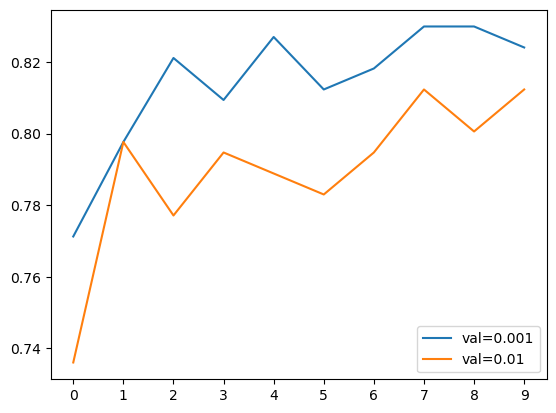

In [28]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [29]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [30]:
model.save_weights('model_v1.h5', save_format='h5')

In [31]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [32]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10


2022-11-22 23:02:05.127737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0834 - accuracy: 0.6235

2022-11-22 23:02:25.913728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 25s 246ms/step - loss: 1.0834 - accuracy: 0.6235 - val_loss: 0.7180 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 22s 232ms/step - loss: 0.6232 - accuracy: 0.7888 - val_loss: 0.6333 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 22s 231ms/step - loss: 0.5042 - accuracy: 0.8364 - val_loss: 0.6121 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 22s 232ms/step - loss: 0.4248 - accuracy: 0.8628 - val_loss: 0.5765 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 22s 232ms/step - loss: 0.3683 - accuracy: 0.8924 - val_loss: 0.5529 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 22s 230ms/step - loss: 0.3223 - accuracy: 0.9055 - val_loss: 0.5558 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 23s 234ms/step - loss: 0.2862 - accuracy: 0.9228 - val_loss: 0.5372 - val_accuracy: 0.8211
Epoch 8/10

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [33]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [34]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10


2022-11-22 23:06:03.879018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.6823 - accuracy: 0.4276

2022-11-22 23:06:25.361775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 26s 245ms/step - loss: 1.6823 - accuracy: 0.4276 - val_loss: 1.2734 - val_accuracy: 0.5924
Epoch 2/10
96/96 [==============================] - 22s 230ms/step - loss: 1.0568 - accuracy: 0.6385 - val_loss: 0.9176 - val_accuracy: 0.7067
Epoch 3/10
96/96 [==============================] - 22s 229ms/step - loss: 0.8072 - accuracy: 0.7265 - val_loss: 0.7961 - val_accuracy: 0.7331
Epoch 4/10
96/96 [==============================] - 22s 230ms/step - loss: 0.6612 - accuracy: 0.7787 - val_loss: 0.7055 - val_accuracy: 0.7801
Epoch 5/10
96/96 [==============================] - 22s 231ms/step - loss: 0.5726 - accuracy: 0.8113 - val_loss: 0.7040 - val_accuracy: 0.7625
Epoch 6/10
96/96 [==============================] - 22s 230ms/step - loss: 0.4936 - accuracy: 0.8396 - val_loss: 0.6525 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 22s 230ms/step - loss: 0.4408 - accuracy: 0.8638 - val_loss: 0.6684 - val_accuracy: 0.7830
Epoch 8/10

2022-11-22 23:09:49.056402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9306 - accuracy: 0.6763

2022-11-22 23:10:10.479632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 25s 247ms/step - loss: 0.9306 - accuracy: 0.6763 - val_loss: 0.6351 - val_accuracy: 0.7859
Epoch 2/10
96/96 [==============================] - 22s 230ms/step - loss: 0.4882 - accuracy: 0.8240 - val_loss: 0.6263 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 22s 230ms/step - loss: 0.3512 - accuracy: 0.8804 - val_loss: 0.5589 - val_accuracy: 0.8270
Epoch 4/10
96/96 [==============================] - 22s 230ms/step - loss: 0.2369 - accuracy: 0.9270 - val_loss: 0.5515 - val_accuracy: 0.8358
Epoch 5/10
96/96 [==============================] - 22s 230ms/step - loss: 0.1770 - accuracy: 0.9524 - val_loss: 0.6868 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 22s 232ms/step - loss: 0.1280 - accuracy: 0.9703 - val_loss: 0.6028 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 22s 229ms/step - loss: 0.0820 - accuracy: 0.9870 - val_loss: 0.6058 - val_accuracy: 0.8123
Epoch 8/10

2022-11-22 23:13:36.373496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9089 - accuracy: 0.6926

2022-11-22 23:13:58.241129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 27s 254ms/step - loss: 0.9089 - accuracy: 0.6926 - val_loss: 0.6125 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 22s 232ms/step - loss: 0.4241 - accuracy: 0.8475 - val_loss: 0.6190 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 22s 231ms/step - loss: 0.2578 - accuracy: 0.9087 - val_loss: 0.5639 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 22s 231ms/step - loss: 0.1505 - accuracy: 0.9521 - val_loss: 0.6612 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 22s 231ms/step - loss: 0.0856 - accuracy: 0.9769 - val_loss: 0.6654 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 22s 231ms/step - loss: 0.0453 - accuracy: 0.9912 - val_loss: 0.6492 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 22s 234ms/step - loss: 0.0372 - accuracy: 0.9935 - val_loss: 0.7103 - val_accuracy: 0.8094
Epoch 8/10

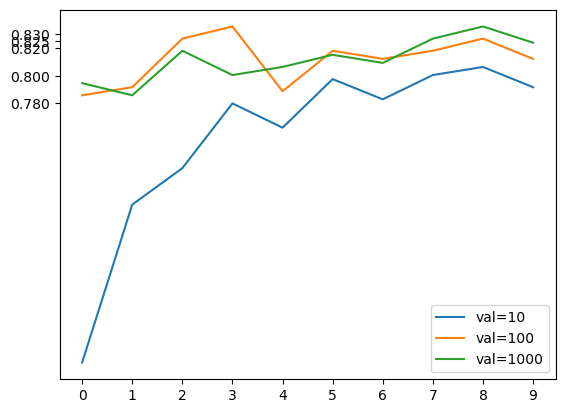

In [35]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [36]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30


2022-11-22 23:18:33.081791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9682 - accuracy: 0.6649

2022-11-22 23:18:54.814191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 26s 254ms/step - loss: 0.9682 - accuracy: 0.6649 - val_loss: 0.6643 - val_accuracy: 0.8094
Epoch 2/30
96/96 [==============================] - 22s 231ms/step - loss: 0.5105 - accuracy: 0.8198 - val_loss: 0.5915 - val_accuracy: 0.8152
Epoch 3/30
96/96 [==============================] - 22s 229ms/step - loss: 0.3387 - accuracy: 0.8954 - val_loss: 0.5886 - val_accuracy: 0.8211
Epoch 4/30
96/96 [==============================] - 22s 230ms/step - loss: 0.2409 - accuracy: 0.9286 - val_loss: 0.5545 - val_accuracy: 0.8123
Epoch 5/30
96/96 [==============================] - 22s 230ms/step - loss: 0.1712 - accuracy: 0.9544 - val_loss: 0.5850 - val_accuracy: 0.8035
Epoch 6/30
96/96 [==============================] - 22s 231ms/step - loss: 0.1193 - accuracy: 0.9713 - val_loss: 0.5832 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 22s 229ms/step - loss: 0.0795 - accuracy: 0.9889 - val_loss: 0.5990 - val_accuracy: 0.8211
Epoch 8/30

2022-11-22 23:29:34.832567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0381 - accuracy: 0.6457

2022-11-22 23:29:56.619025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 26s 252ms/step - loss: 1.0381 - accuracy: 0.6457 - val_loss: 0.6455 - val_accuracy: 0.7889
Epoch 2/30
96/96 [==============================] - 22s 228ms/step - loss: 0.5841 - accuracy: 0.7920 - val_loss: 0.5727 - val_accuracy: 0.8182
Epoch 3/30
96/96 [==============================] - 22s 226ms/step - loss: 0.4422 - accuracy: 0.8494 - val_loss: 0.5884 - val_accuracy: 0.7889
Epoch 4/30
96/96 [==============================] - 22s 228ms/step - loss: 0.3373 - accuracy: 0.8827 - val_loss: 0.5599 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 22s 225ms/step - loss: 0.2622 - accuracy: 0.9136 - val_loss: 0.6047 - val_accuracy: 0.8094
Epoch 6/30
96/96 [==============================] - 22s 226ms/step - loss: 0.1958 - accuracy: 0.9364 - val_loss: 0.5853 - val_accuracy: 0.8358
Epoch 7/30
96/96 [==============================] - 22s 226ms/step - loss: 0.1549 - accuracy: 0.9547 - val_loss: 0.5783 - val_accuracy: 0.8299
Epoch 8/30

2022-11-22 23:40:33.565613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.2510 - accuracy: 0.5786

2022-11-22 23:40:55.756781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 27s 259ms/step - loss: 1.2510 - accuracy: 0.5786 - val_loss: 0.7743 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 22s 228ms/step - loss: 0.7970 - accuracy: 0.7249 - val_loss: 0.6445 - val_accuracy: 0.7889
Epoch 3/30
96/96 [==============================] - 22s 227ms/step - loss: 0.6318 - accuracy: 0.7816 - val_loss: 0.6378 - val_accuracy: 0.7889
Epoch 4/30
96/96 [==============================] - 22s 226ms/step - loss: 0.5366 - accuracy: 0.8155 - val_loss: 0.5875 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 22s 225ms/step - loss: 0.4565 - accuracy: 0.8445 - val_loss: 0.5829 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 22s 226ms/step - loss: 0.3933 - accuracy: 0.8638 - val_loss: 0.5364 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 22s 227ms/step - loss: 0.3122 - accuracy: 0.8895 - val_loss: 0.5699 - val_accuracy: 0.8094
Epoch 8/30

2022-11-22 23:51:31.676021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.7269 - accuracy: 0.4250

2022-11-22 23:51:53.217649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 26s 253ms/step - loss: 1.7269 - accuracy: 0.4250 - val_loss: 1.1582 - val_accuracy: 0.6628
Epoch 2/30
96/96 [==============================] - 22s 229ms/step - loss: 1.2825 - accuracy: 0.5619 - val_loss: 0.9827 - val_accuracy: 0.7067
Epoch 3/30
96/96 [==============================] - 22s 227ms/step - loss: 1.1189 - accuracy: 0.6118 - val_loss: 0.8604 - val_accuracy: 0.7449
Epoch 4/30
96/96 [==============================] - 22s 226ms/step - loss: 1.0312 - accuracy: 0.6457 - val_loss: 0.7320 - val_accuracy: 0.7683
Epoch 5/30
96/96 [==============================] - 22s 226ms/step - loss: 0.9390 - accuracy: 0.6835 - val_loss: 0.7406 - val_accuracy: 0.7595
Epoch 6/30
96/96 [==============================] - 22s 226ms/step - loss: 0.8773 - accuracy: 0.6910 - val_loss: 0.6983 - val_accuracy: 0.7859
Epoch 7/30
96/96 [==============================] - 22s 228ms/step - loss: 0.8386 - accuracy: 0.7093 - val_loss: 0.6735 - val_accuracy: 0.7801
Epoch 8/30

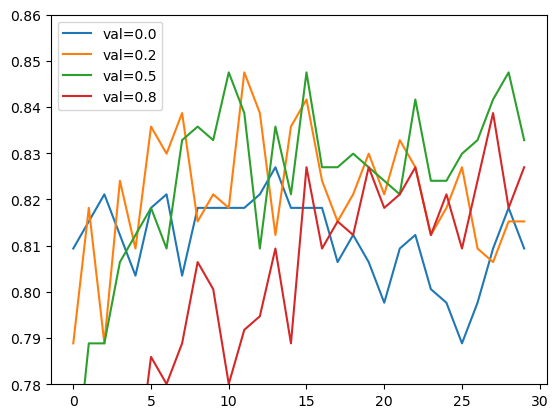

In [38]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

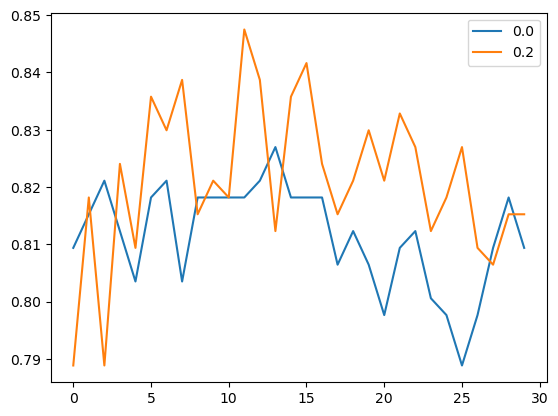

In [39]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [40]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [41]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


2022-11-23 08:14:56.763856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0677 - accuracy: 0.6441

2022-11-23 08:15:18.912152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 27s 259ms/step - loss: 1.0677 - accuracy: 0.6441 - val_loss: 0.6896 - val_accuracy: 0.7507
Epoch 2/50
96/96 [==============================] - 22s 230ms/step - loss: 0.6193 - accuracy: 0.7839 - val_loss: 0.5937 - val_accuracy: 0.8006
Epoch 3/50
96/96 [==============================] - 22s 230ms/step - loss: 0.4555 - accuracy: 0.8462 - val_loss: 0.5717 - val_accuracy: 0.8035
Epoch 4/50
96/96 [==============================] - 22s 229ms/step - loss: 0.3548 - accuracy: 0.8765 - val_loss: 0.5374 - val_accuracy: 0.8152
Epoch 5/50
96/96 [==============================] - 22s 230ms/step - loss: 0.2691 - accuracy: 0.9071 - val_loss: 0.5493 - val_accuracy: 0.8182
Epoch 6/50
96/96 [==============================] - 22s 232ms/step - loss: 0.2069 - accuracy: 0.9384 - val_loss: 0.5288 - val_accuracy: 0.8240
Epoch 7/50
96/96 [==============================] - 22s 230ms/step - loss: 0.1615 - accuracy: 0.9534 - val_loss: 0.5312 - val_accuracy: 0.8270
Epoch 8/50

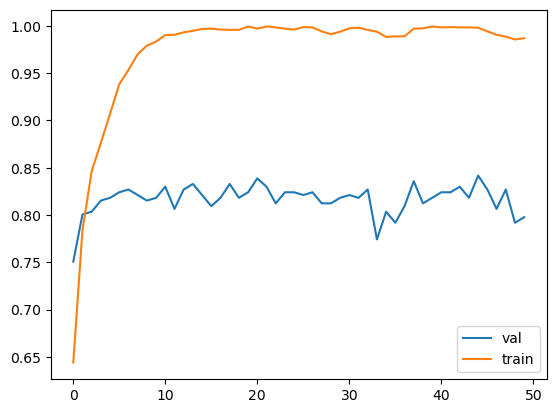

In [42]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [43]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [44]:
input_size = 299

In [45]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [46]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [47]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2022-11-23 09:38:24.996839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9777 - accuracy: 0.6982

2022-11-23 09:39:46.345091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 93s 943ms/step - loss: 0.9777 - accuracy: 0.6982 - val_loss: 0.5662 - val_accuracy: 0.8416
Epoch 2/50
96/96 [==============================] - 90s 928ms/step - loss: 0.5141 - accuracy: 0.8263 - val_loss: 0.4297 - val_accuracy: 0.8534
Epoch 3/50
96/96 [==============================] - 89s 921ms/step - loss: 0.4290 - accuracy: 0.8569 - val_loss: 0.4386 - val_accuracy: 0.8563
Epoch 4/50
96/96 [==============================] - 88s 912ms/step - loss: 0.3714 - accuracy: 0.8706 - val_loss: 0.3907 - val_accuracy: 0.8768
Epoch 5/50
96/96 [==============================] - 88s 915ms/step - loss: 0.3375 - accuracy: 0.8823 - val_loss: 0.4043 - val_accuracy: 0.8592
Epoch 6/50
96/96 [==============================] - 88s 913ms/step - loss: 0.3037 - accuracy: 0.8967 - val_loss: 0.3970 - val_accuracy: 0.8534
Epoch 7/50
96/96 [==============================] - 88s 909ms/step - loss: 0.2900 - accuracy: 0.9025 - val_loss: 0.3716 - val_accuracy: 0.8768
Epoch 8/50

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [50]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [51]:
model = keras.models.load_model('xception_v4_1_16_0.900.h5')

In [52]:
model.evaluate(test_ds)

2022-11-23 11:10:06.787560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 12s 869ms/step - loss: 0.2666 - accuracy: 0.9059


[0.2666345536708832, 0.9059139490127563]

In [53]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [54]:
img = load_img(path, target_size=(299, 299))

In [55]:
import numpy as np

In [56]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [57]:
X = preprocess_input(X)

In [58]:
pred = model.predict(X)

2022-11-23 11:11:11.208076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step


In [59]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [60]:
dict(zip(classes, pred[0]))

{'dress': -2.9471607,
 'hat': -6.433881,
 'longsleeve': -2.5868392,
 'outwear': -2.8418453,
 'pants': 9.301425,
 'shirt': -2.0906184,
 'shoes': -6.1529565,
 'shorts': 3.7159798,
 'skirt': -5.532726,
 't-shirt': -3.2225685}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

